# C1: INTRODUCTION TO UNSUPERVISED LEARNING, CLUSTERING AND K-MEANS ALGORTHM

# Introduction to Unsupervised Learning

- **Definition:** A type of machine learning where the model is trained on unlabeled data (no predefined answers).
- **Goal:** To find patterns, structures, or groupings in the data without explicit supervision.
- **Supervised vs Unsupervised Learning**

| Type                  | Supervised Learning                        | Unsupervised Learning                          |
|-----------------------|---------------------------------------------|-----------------------------------------------|
| **Data**              | Has input + labeled output                 | Has only input, no labels                     |
| **Goal**              | Learn a mapping from input → output        | Find hidden structures, patterns, or groups   |
| **Tasks**             | Classification, Regression, etc.           | Clustering, Dimensionality Reduction, etc.    |
| **Example**           | Input features of a house → price          | Customer purchase history                     |

- **Common Tasks:**
  - **Clustering:** Grouping similar data points (e.g., customer segmentation).
  - **Dimensionality Reduction:** Simplifying data while preserving important information.
  - **Anomaly Detection:** Identifying unusual data points.

- **Examples:**
  - Grouping customers by shopping behavior.
  - Compressing images for storage.
  - Detecting fraud in banking.

# Clustering

- Clustering is an **unsupervised learning technique**.
- **Goal:** Group similar data points into clusters such that each point belongs to a group with high internal similarity.
- No labels are given → the algorithm finds structure by itself.

### Key Concepts
- **Similarity Measure:** Usually based on distance metrics.
- **Centroid / Density / Hierarchy:** Different methods of forming clusters.
- **Number of Clusters (k):** Can be predefined or discovered automatically.

### Common Algorithms
- **K-Means:** Partitions data into *k* clusters by minimizing distance to cluster centroids.
- **Hierarchical Clustering:** Builds a tree (*dendrogram*) of clusters.
- **DBSCAN:** Finds clusters based on density; handles noise and outliers well.
- **Gaussian Mixture Models (GMM):** Assumes data is generated from multiple Gaussian distributions.

### Applications
- Customer segmentation.
- Anomaly detection.
- Image compression.
- Document/topic clustering.

# Distance Metrics

## Euclidean Distance
- Measures the straight-line distance between two points in space.
- **Formula:**  
  For two points $P(x_1, y_1, ..., n_1)$ and $Q(x_2, y_2, ..., n_2)$ in *n*-dimensional space:  <br>
$\mathrm{d(P,Q)} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + ... + (n_2 - n_1)}$
<br>
- **Intuition:** Like using a ruler to measure the shortest path between two points.
- **Applications:**
  - Basis of **K-Nearest Neighbors (KNN)**.
  - Used in similarity measurement.

## Manhattan Distance
- Measures distance between two points by summing the absolute differences of their coordinates.
- Instead of a straight line, it moves along grid-like paths.
- **Formula:**  
  For two points $P(x_1, y_1, ..., n_1)$ and $Q(x_2, y_2, ..., n_2)$ in *n*-dimensional space:  <br>
    $\mathrm{d(P,Q)} = |x_2 - x_1| + |y_2 - y_1| + ... + |n_2 - n_1|$
    <br>
- **Intuition:** Like moving in a city with horizontal and vertical streets, where diagonal movement is not allowed.
- **Applications:**
  - Useful when data has high dimensions.
  - Works well with sparse data.
  - Used in clustering and nearest neighbor search when grid-like movement is more appropriate.

Euclidean Distance: 5.0
Manhattan Distance: 7


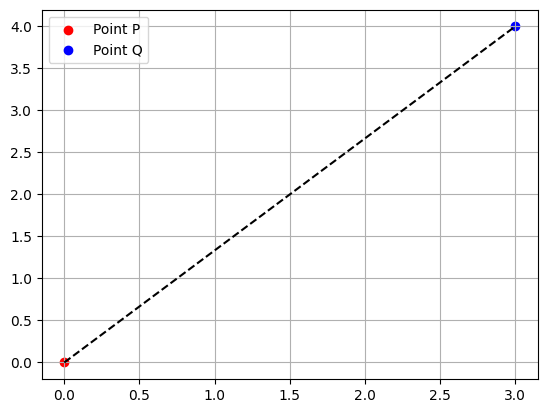

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Two points
p = np.array([0, 0])
q = np.array([3, 4])

# Euclidean distance
euclidean = np.linalg.norm(p - q)

# Manhattan distance
manhattan = np.sum(np.abs(p - q))

print("Euclidean Distance:", euclidean)
print("Manhattan Distance:", manhattan)

# Plotting
plt.scatter(p[0], p[1], c='red', label='Point P')
plt.scatter(q[0], q[1], c='blue', label='Point Q')
plt.plot([p[0], q[0]], [p[1], q[1]], 'k--')  # line between them
plt.legend()
plt.grid(True)
plt.show()

# K-Means Clustering

- **Definition:**  
  K-Means is an unsupervised learning algorithm that partitions data into **K groups (clusters)** such that:
  - Points in the same cluster are **similar**.
  - Points in different clusters are **dissimilar**.

- **Example:**  
  A mall wants to group customers by spending habits:
  - **Cluster 1:** Low spenders  
  - **Cluster 2:** Medium spenders  
  - **Cluster 3:** High spenders  

## How K-Means Works
1. Choose the number of clusters **K**.  
2. Initialize centroids (randomly or using a method like k-means++).  
3. Assign each point to the nearest centroid.  
4. Update centroids by computing the mean of points in each cluster.  
5. Repeat steps 3–4 until centroids stop moving significantly (convergence).

## Finding the Optimal K

### 1. Elbow Method
- Compute the **Within-Cluster Sum of Squares (WCSS)** for different values of *K*.  
- Plot *K* vs. WCSS.  
- Look for the **"elbow point"**, where the reduction in WCSS slows down.  

### 2. Silhouette Score
- Measures how well a point fits within its cluster compared to other clusters.  
- **Range:** -1 to 1  
  - **+1:** Point is well clustered.  
  - **0:** Point lies on the boundary between clusters.  
  - **-1:** Point is likely in the wrong cluster.  
- **Higher score = better clustering**.  


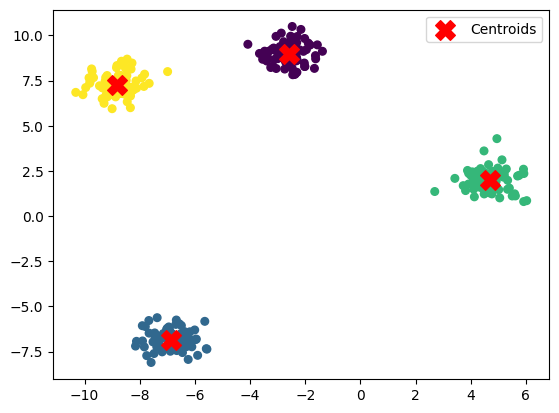

Silhouette Score: 0.8756469540734731


In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Try KMeans with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
y_pred = kmeans.fit_predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.show()

# Evaluate with silhouette score
score = silhouette_score(X, y_pred)
print("Silhouette Score:", score)